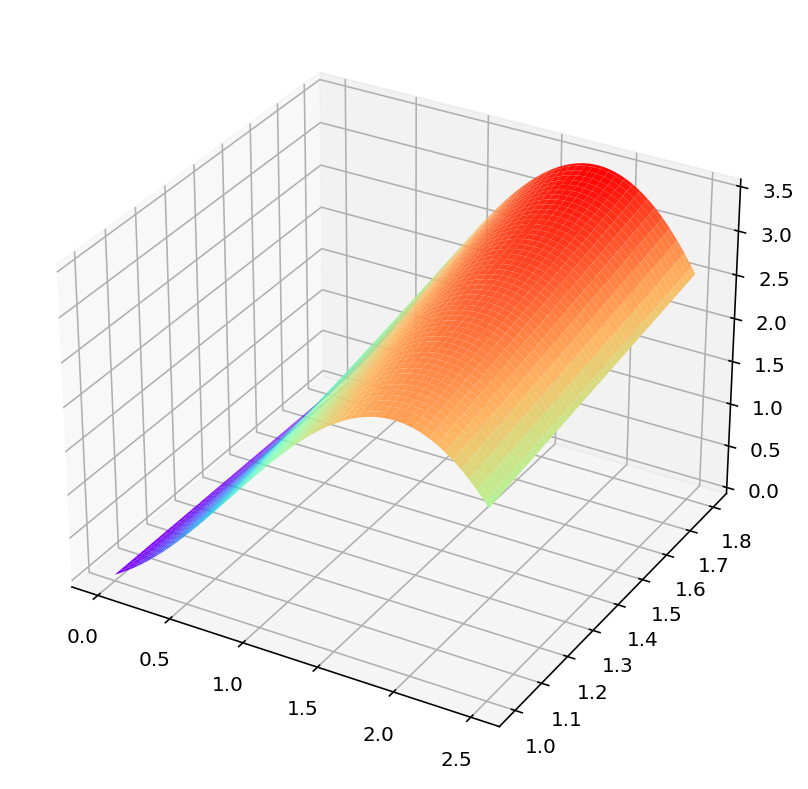

4.098393373208164


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
from matplotlib import cm
from simpsonsuper import simpson3d
fig=plt.figure()
axl=fig.add_subplot(1,1,1,projection='3d')
x1=np.linspace(0,2.5,100)
x2=np.linspace(1,1.8,100)
XX,YY=np.meshgrid(x1,x2)
Z=np.sin(XX)*(XX+YY)
axl.plot_surface(XX,YY,Z,cmap=cm.rainbow)
plt.show()
def f(x,y):
    return(x+y)*np.sin(x)
r=simpson3d(f,0,2.5,1,1.8,10,10)
print(r)

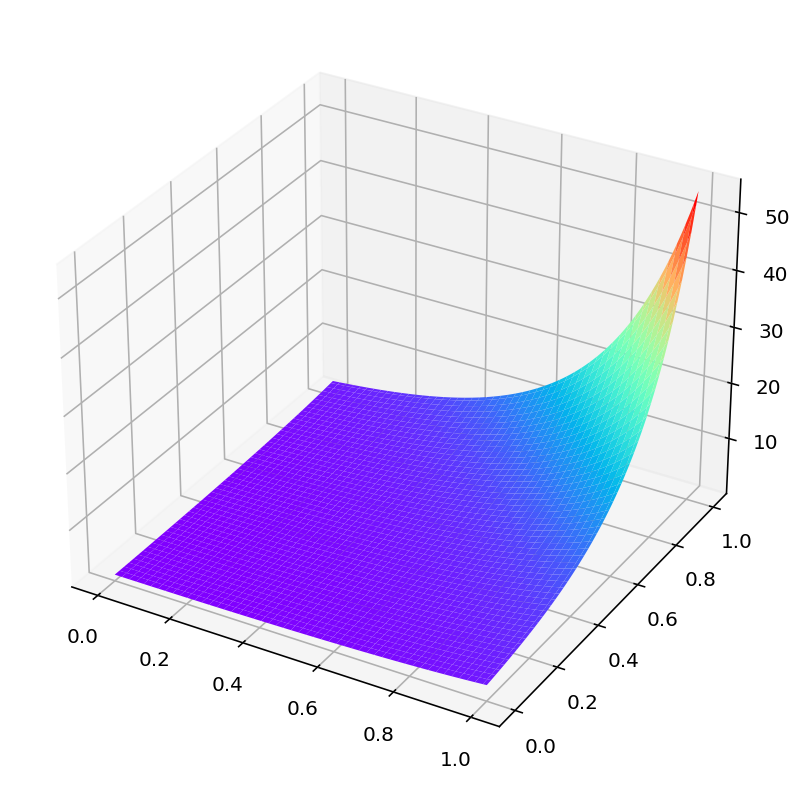

4.899158956848499


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
from matplotlib import cm
from simpsonsuper import simpson3d
fig=plt.figure()
axl=fig.add_subplot(1,1,1,projection='3d')
x1=np.linspace(0,1,100)
x2=np.linspace(0,1,100)
XX,YY=np.meshgrid(x1,x2)
Z=np.exp((XX+YY)**2)
axl.plot_surface(XX,YY,Z,cmap=cm.rainbow)
plt.show()
def f(x,y):
    return np.exp((x+y)**2)
r=simpson3d(f,0,1,0,1,100,100)
print(r)

In [11]:
from simpson3Discreto import simpson3Discreto
import numpy as np
f=np.array([[0.,0.,4.,6.,0.],
            [0.,3.,5.,7.,3.],
            [1.,5.,6.,9.,5.],
            [0.,2.,3.,5.,1.],
            [0.,0.,1.,2.,0.]])
ax=0
bx=400
ay=0
by=200
m=4
n=4
volumen=simpson3Discreto(f,ax,bx,ay,by,m,n)
print (volumen)

175955.5555555556


In [1]:
#Integrales limites variables.
from simpson3lv import simpson3lv
def f(x,y):
    return (x**2+y**3)
def h(x):
    return x
def g(x):
    return 2*x
r=simpson3lv(f,0,1,h,g,2,2)
print(r)

1.03125


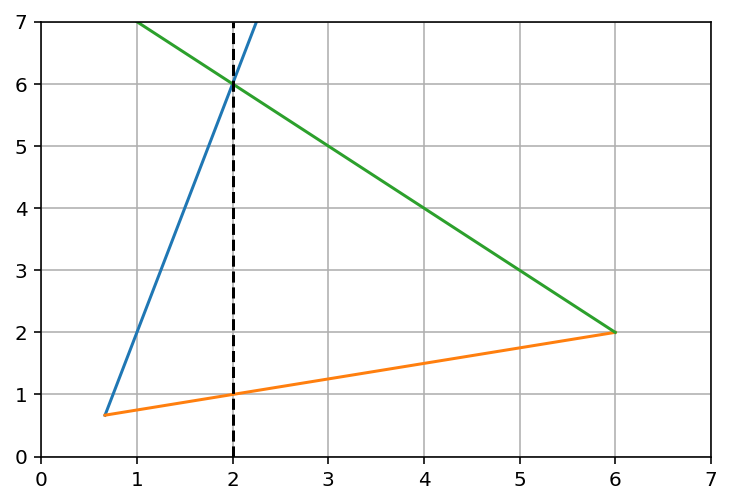

53.96279718390332


In [14]:
#Integrales limites variables sobre una área restringida, la cual se parte en dos áreas
from simpson3lv import simpson3lv
import math
import numpy as np
import matplotlib.pyplot as plt
def f(x,y):
    return math.sqrt(x*y+y**2)
def h(x):
    return x/4+1/2
def g(x):
    return 4*x-2
r=simpson3lv(f,2/3,2,h,g,20,20)
def j(x):
    return x/4+0.5
def k(x):
    return 8-x
r1=simpson3lv(f,2,6,j,k,20,20)
x1=np.linspace(2/3,6,100)
f=4*x1-2
g=x1/4+0.5
h=8-x1
fig, ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(x1,f)
ax.plot(x1,g)
ax.plot(x1,h)
ax.set_ylim(0,7)
ax.set_xlim(0,7)
ax.axvline(x=2,color='black',linestyle='--')
ax.grid()
plt.show()
print (r+r1)

### Intregales dobles con puntos singulares
Cambio de variable
$S=\int_0^{0.5}\int_0^{0.5}\frac{e^{y-x}}{x^{1/3}}$
Se $u=x^{1/3}$

In [15]:
from math import *
from simpsonsuper import simpson3d
def f(x,y):
    return 3*x*math.exp(y-x**3)
r=simpson3d(f,0,0.5**(1/3),0,0.5,4,4)
print(r)

0.5075301074265403


### Intregales dobles con puntos singulares y limites variables
$\int _1^2\int_1^y \frac{sen(x+y)}{\sqrt{2-x}}$
Sea $u=\sqrt{2-x}$


In [4]:
from simpson3lv import simpson3lv
import math
def f(x,y):
    return 2*math.sin(2-y**2+x)
def g(x):
    #Para sacar su norma ya que sale complejo
    return abs((2-x)**(1/2))
def h(x):
    return 1
r=simpson3lv(f,1,2,g,h,20,20)
print (r)

0.022965150795273052


### Integración por monte Carlo

In [5]:
#Monte Carlo integración
import numpy as np
import math
from simpson import simpson
N=100
x=np.random.uniform(0,1,size=(1,N))
def f(x):
    return np.exp(-(2.5*x)**2/2.0)
Interaprox=f(x)
Total=5.0*(Interaprox.sum())/(N*np.sqrt(2*np.pi))
print(Total)
#Comparamos con e metodo de Simpson
def f(x):
    return 1/(math.sqrt(2*math.pi))*math.exp((-x**2)/2)
r=simpson(f,-2.5,2.5,20)
print(r)

0.9859218653004087
0.9875743713092442


In [7]:
import numpy as np
N=100000
x,y=np.random.uniform(0,1,size=(2,N))
def f(x,y):
    return np.exp((x+y)**2)
Interaprox=f(x,y)
Total=(Interaprox.sum())/N
print(Total)

4.878343151752133


#### Aproxime el valor de:
$\int_0^1...\int_0^12^{-7}(\Sigma_{i=1} ^8x_i)^2dx_1dx_2...dx_8$

In [12]:
#MonteCarlo
N=1000000
import numpy as np
x1,x2,x3,x4,x5,x6,x7,x8=np.random.uniform(0,1,size=(8,N))
def f(x,y):
    return((x1+x2+x3+x4+x5+x6+x7+x8)**2)
Iteraprox=f(x,y)
Total=(2**(-7)*Iteraprox.sum())/N
print (Total)

0.1301148380960394


## Numerical Differentiation

In [17]:
import math
def fun(x):
    return x*math.sin(x)
def exactDeriv(x):
    return math.sin(x)+x*math.cos(x)
x0=1.0
exact=exactDeriv(x0)
for i in range(5):
    h=10**(-i+1)
    df_forw=(fun(x0+h)-fun(x0)/h)
    df_back=(fun(x0)-fun(x0-h)/h)
    df_center=(fun(x0+h)-fun(x0-h)/2*h)
    print(h)
    print("foward error: %.le"% math.fabs(df_forw-exact))
    print("backward error: %.le"% math.fabs(df_back-exact))
    print("centered error: %.le"% math.fabs(df_center-exact))

10
foward error: 1e+01
backward error: 9e-01
centered error: 3e+01
1
foward error: 4e-01
backward error: 5e-01
centered error: 4e-01
0.1
foward error: 9e+00
backward error: 8e+00
centered error: 4e-01
0.01
foward error: 8e+01
backward error: 8e+01
centered error: 5e-01
0.001
foward error: 8e+02
backward error: 8e+02
centered error: 5e-01


In [21]:
import math
def fun(x):
    return x*math.sin(x)
def exacSecDeriv(x):
    return 2.0*math.cos(x)-math.sin(x)
x0=1.0
exact=exacSecDeriv(x0)
for i in range(5):
    h=10**(-i-1)
    ddf_center=(fun(x0+h)-2.0*fun(x0)+fun(x0-h))
    ddf_center=ddf_center/(h**2)
    print ("h= ",h,":error is %.4e"%math.fabs(ddf_center-exact))

h=  0.1 :error is 1.0991e-03
h=  0.01 :error is 1.0998e-05
h=  0.001 :error is 1.1005e-07
h=  0.0001 :error is 2.9147e-09
h=  1e-05 :error is 1.7512e-06
